# 패키지 import

In [1]:
import os
import win32com.client as win32
from pathlib import Path
import pandas as pd
import numpy as np
import time
from pptx import Presentation
import re

from tqdm import trange
from time import sleep
from tqdm import tqdm

from eunjeon import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

from konlpy.tag import Kkma, Komoran, Okt
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models

from wordcloud import WordCloud
from collections import Counter
import ipywidgets as widgets
import qgrid

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify
plt.style.use('seaborn-white')

from apyori import apriori

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumGothic')
mpl.font_manager._rebuild()

# 형태소 분석

## 데이터 로드

In [120]:
df = pd.read_csv('D:/project/2022/주원포폴/001네오플/네오플/4. 데이터 가공/복귀/복귀유저데이터_감성분석_사이트.csv')
df

,Unnamed: 0,Column1,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,감성점수,emotion,사이트
0,0,11040,연장,2021-04-14 7:42,4322,1,https://arca.live/b/dunfa/24483044?target=all&...,https://arca.live/b/dunfa/24408321위 링크에 이어 쓰는 ...,두서없고 의식의 흐름대로 쓰는공략2 - 100까지 육성,두서없고 의식의 흐름대로 쓰는공략2 - 100까지 육성https://arca.liv...,25,positive,arca
1,1,873,juss4784,2021-03-23 19:22,183,0,https://cafe.naver.com/dfither/21521042,1. 파밍 개선 - 이건 필수라고 생각함1)100렙제 에픽 신화 파밍도인제 1년 3...,퍼섭에 뭐가나올지?? 그리고 현재 던파...?,퍼섭에 뭐가나올지?? 그리고 현재 던파...?1. 파밍 개선 - 이건 필수라고 생각...,21,positive,naver
2,2,11042,연장,2021-04-13 3:14,1378,6,https://arca.live/b/dunfa/24408321?target=all&...,일단 본인은 05년부터쭉하다가 17년중반때 접고 딴겜했다가 궁둥이 터져서 복귀해가지...,두서없고 의식의 흐름대로 쓰는공략1 - 파입문편,두서없고 의식의 흐름대로 쓰는공략1 - 파입문편일단 본인은 05년부터쭉하다가 17년...,21,positive,arca
3,3,1228,쁘이,2021-02-10 1:04,266,0,https://cafe.naver.com/dfither/21440097,1월 중순 복귀하고 학생때부터 키워보고싶엇던 인파 시작 ㄱㄱ함 최근 일주일 운빨이 ...,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음1월 중...,19,positive,naver
4,4,6775,홍련77,2022-03-02 8:36,1916,1,https://arca.live/b/dunfa/45463736?target=all&...,전직업 만렙+ 몇개더 만렙임다음 시즌에 사령 여렝거 장군님 세라핌 + 알파 들고갈건...,전직업만렙+알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점,전직업만렙+알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점전직업 만렙+ 몇개더 ...,19,positive,arca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,11126,7736,rintia,2022-01-16 16:58,2559,52,https://arca.live/b/dunfa/42592307?target=all&...,최근 신캐 출시며 여러 이벤트로 신규/복귀 유저들이 많이 늘었음.챈만 봐도 질문글 ...,이번 이벤트를 통해 본 파의 가이드 고찰(장문/세줄요약),이번 이벤트를 통해 본 파의 가이드 고찰(장문/세줄요약)최근 신캐 출시며 여러 이벤...,-20,negative,arca
11127,11127,5541,클레이모어,2022-04-21 18:21,2212,25,https://arca.live/b/dunfa/48945689?target=all&...,86렙이 만렙이였던 시절씨팔 헬에 목숨건 병신새끼마냥 헬만 주구장창 돌고있었음 넨마...,파 복귀하 친구 손절한 썰,파 복귀하 친구 손절한 썰86렙이 만렙이였던 시절씨팔 헬에 목숨건 병신새끼마냥 헬만...,-22,negative,arca
11128,11128,6779,Prless,2022-03-02 6:28,524,0,https://arca.live/b/dunfa/45456327?target=all&...,마법봉인 장비 * 100Lv 마법봉인 장비 아이템 옵션 및 모험가 명성 수치가 변경...,장비 변경 사항 2,장비 변경 사항 2마법봉인 장비 * 100Lv 마법봉인 장비 아이템 옵션 및 모험가...,-23,negative,arca
11129,11129,7311,흐르미,2022-01-29 19:51,386,2,https://arca.live/b/dunfa/43468304?target=all&...,나는 어떤 길드의 부길마임 ㅇㅇ어떤 사정에 의해서 어찌저찌 오즈마 길드 공대를 운영...,길공 때문에 강퇴 시키고 싶은놈이 있는데....,길공 때문에 강퇴 시키고 싶은놈이 있는데....나는 어떤 길드의 부길마임 ㅇㅇ어떤 ...,-27,negative,arca


## 불용어(Stopwords) 사전 만들기

In [181]:
stop_words = ['이것', '이거', '복귀', '안녕', '질문', '가요', '유저', '고민중', '고민', '하나', '정도', '겜','게임',
             '던파','던전앤파이터','캐릭','어디','네오플','다음','안톤','바칼','카인','카시야스','디레지에','힐더',
              '프레이','시로코','이번','린이','뉴비','옛날','신규','때문','생각','가능','오늘','그냥','기분',
             '잡고','거기','처럼','한번','진짜','일단','처럼','지금','시작'] 

## 명사 추출 함수 만들기
  - 1글자 이상의 명사만 추출
  - 불용어 제거 처리

In [ ]:
def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stop_words]
    return nouns

## 텍스트 클리닝

In [183]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result

df['수정_제목+내용'] = df['제목+내용'].apply(lambda x : text_cleaning(x))
df.head()

,Unnamed: 0,Column1,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,감성점수,emotion,사이트,수정_제목+내용,nouns
0,0,11040,연장,2021-04-14 7:42,4322,1,https://arca.live/b/dunfa/24483044?target=all&...,https://arca.live/b/dunfa/24408321위 링크에 이어 쓰는 ...,두서없고 의식의 흐름대로 쓰는공략2 - 100까지 육성,두서없고 의식의 흐름대로 쓰는공략2 - 100까지 육성https://arca.liv...,25,positive,arca,두서없고 의식의 흐름대로 쓰는공략 까지 육성위 링크에 이어 쓰는 공략임원래 파밍단...,"[두서, 의식, 흐름, 공략, 육성, 링크, 공략, 임원, 파밍, 단계, 아예, 누..."
1,1,873,juss4784,2021-03-23 19:22,183,0,https://cafe.naver.com/dfither/21521042,1. 파밍 개선 - 이건 필수라고 생각함1)100렙제 에픽 신화 파밍도인제 1년 3...,퍼섭에 뭐가나올지?? 그리고 현재 던파...?,퍼섭에 뭐가나올지?? 그리고 현재 던파...?1. 파밍 개선 - 이건 필수라고 생각...,21,positive,naver,퍼섭에 뭐가나올지 그리고 현재 던파 파밍 개선 이건 필수라고 생각함렙제 에픽 신화...,"[퍼섭, 현재, 파밍, 개선, 이건, 필수, 함렙제, 에픽, 신화, 파밍, 인제, ..."
2,2,11042,연장,2021-04-13 3:14,1378,6,https://arca.live/b/dunfa/24408321?target=all&...,일단 본인은 05년부터쭉하다가 17년중반때 접고 딴겜했다가 궁둥이 터져서 복귀해가지...,두서없고 의식의 흐름대로 쓰는공략1 - 파입문편,두서없고 의식의 흐름대로 쓰는공략1 - 파입문편일단 본인은 05년부터쭉하다가 17년...,21,positive,arca,두서없고 의식의 흐름대로 쓰는공략 파입문편일단 본인은 년부터쭉하다가 년중반때 접고...,"[두서, 의식, 흐름, 공략, 일단, 본인, 다가, 궁둥이, 아라드, 정착, 종종,..."
3,3,1228,쁘이,2021-02-10 1:04,266,0,https://cafe.naver.com/dfither/21440097,1월 중순 복귀하고 학생때부터 키워보고싶엇던 인파 시작 ㄱㄱ함 최근 일주일 운빨이 ...,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음1월 중...,19,positive,naver,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음월 중순...,"[평생, 대장, 전환, 중순, 학생, 인파, 시작, 최근, 일주일, 운빨, 몬가몬,..."
4,4,6775,홍련77,2022-03-02 8:36,1916,1,https://arca.live/b/dunfa/45463736?target=all&...,전직업 만렙+ 몇개더 만렙임다음 시즌에 사령 여렝거 장군님 세라핌 + 알파 들고갈건...,전직업만렙+알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점,전직업만렙+알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점전직업 만렙+ 몇개더 ...,19,positive,arca,전직업만렙알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점전직업 만렙 몇개더 만렙...,"[직업, 만렙, 알파, 여캐, 애정, 장단점, 직업, 만렙, 몇개, 만렙, 시즌, ..."


## 형태소 분석 수행

In [184]:
df['nouns'] = df['수정_제목+내용'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(11131, 15)


,Unnamed: 0,Column1,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,감성점수,emotion,사이트,수정_제목+내용,nouns
0,0,11040,연장,2021-04-14 7:42,4322,1,https://arca.live/b/dunfa/24483044?target=all&...,https://arca.live/b/dunfa/24408321위 링크에 이어 쓰는 ...,두서없고 의식의 흐름대로 쓰는공략2 - 100까지 육성,두서없고 의식의 흐름대로 쓰는공략2 - 100까지 육성https://arca.liv...,25,positive,arca,두서없고 의식의 흐름대로 쓰는공략 까지 육성위 링크에 이어 쓰는 공략임원래 파밍단...,"[두서, 의식, 흐름, 공략, 육성, 링크, 공략, 임원, 파밍, 단계, 아예, 누..."
1,1,873,juss4784,2021-03-23 19:22,183,0,https://cafe.naver.com/dfither/21521042,1. 파밍 개선 - 이건 필수라고 생각함1)100렙제 에픽 신화 파밍도인제 1년 3...,퍼섭에 뭐가나올지?? 그리고 현재 던파...?,퍼섭에 뭐가나올지?? 그리고 현재 던파...?1. 파밍 개선 - 이건 필수라고 생각...,21,positive,naver,퍼섭에 뭐가나올지 그리고 현재 던파 파밍 개선 이건 필수라고 생각함렙제 에픽 신화...,"[퍼섭, 현재, 파밍, 개선, 이건, 필수, 함렙제, 에픽, 신화, 파밍, 인제, ..."
2,2,11042,연장,2021-04-13 3:14,1378,6,https://arca.live/b/dunfa/24408321?target=all&...,일단 본인은 05년부터쭉하다가 17년중반때 접고 딴겜했다가 궁둥이 터져서 복귀해가지...,두서없고 의식의 흐름대로 쓰는공략1 - 파입문편,두서없고 의식의 흐름대로 쓰는공략1 - 파입문편일단 본인은 05년부터쭉하다가 17년...,21,positive,arca,두서없고 의식의 흐름대로 쓰는공략 파입문편일단 본인은 년부터쭉하다가 년중반때 접고...,"[두서, 의식, 흐름, 공략, 본인, 다가, 궁둥이, 아라드, 정착, 종종, 텐지넨..."
3,3,1228,쁘이,2021-02-10 1:04,266,0,https://cafe.naver.com/dfither/21440097,1월 중순 복귀하고 학생때부터 키워보고싶엇던 인파 시작 ㄱㄱ함 최근 일주일 운빨이 ...,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음1월 중...,19,positive,naver,평생이겜저겜 다하면서 어느겜이든 운없찐대장으로 살앗는데 드디어 전환점이 왔음월 중순...,"[평생, 대장, 전환, 중순, 학생, 인파, 최근, 일주일, 운빨, 몬가몬, 저번,..."
4,4,6775,홍련77,2022-03-02 8:36,1916,1,https://arca.live/b/dunfa/45463736?target=all&...,전직업 만렙+ 몇개더 만렙임다음 시즌에 사령 여렝거 장군님 세라핌 + 알파 들고갈건...,전직업만렙+알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점,전직업만렙+알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점전직업 만렙+ 몇개더 ...,19,positive,arca,전직업만렙알파 유저가 쓰는 여캐 애정캐 정하기 캐릭별 장단점전직업 만렙 몇개더 만렙...,"[직업, 만렙, 알파, 여캐, 애정, 장단점, 직업, 만렙, 몇개, 만렙, 시즌, ..."


# 네트워크 분석

## 데이터 정의
  - 이중리스트의 형태로 데이터 만들기

In [185]:
dataset =[]
for i in tqdm(range(len(df))):
    dataset.append(df['nouns'][i])
dataset

100%|████████████████████████████████████████████████████████████████████████| 11131/11131 [00:00<00:00, 261146.90it/s]


[['두서',
  '의식',
  '흐름',
  '공략',
  '육성',
  '링크',
  '공략',
  '임원',
  '파밍',
  '단계',
  '아예',
  '누비',
  '입장',
  '대중',
  '단계',
  '분석',
  '찌찌',
  '여캐',
  '인형',
  '안해',
  '이건',
  '분석',
  '유튭',
  '소개',
  '영상',
  '유튜',
  '버들',
  '나무',
  '위키',
  '개인',
  '추천',
  '시너지',
  '경우',
  '에테르',
  '나로',
  '상위',
  '컨텐츠',
  '진입',
  '속도',
  '시너지',
  '팔라딘',
  '버퍼',
  '기준',
  '선호',
  '유틸',
  '크루',
  '무기',
  '강화',
  '비용',
  '절감',
  '순간',
  '폭딜',
  '드래곤',
  '나이트',
  '추천',
  '나이트',
  '여캐',
  '기본',
  '시스템',
  '피로',
  '이제',
  '대충',
  '캐릭터',
  '레벨',
  '차례',
  '우선',
  '피로',
  '시스템',
  '평일',
  '기준',
  '지급',
  '주말',
  '피로',
  '입장',
  '이동',
  '역시',
  '소모',
  '보스',
  '던전',
  '클리어',
  '보스',
  '대한',
  '경험치',
  '합산',
  '거나',
  '보스',
  '겸치',
  '특수',
  '던전',
  '경우',
  '입장',
  '모함',
  '이건',
  '다다',
  '공략',
  '상세',
  '예정',
  '피로',
  '렙업',
  '하든',
  '파밍',
  '재료',
  '수급',
  '육성',
  '앞서서',
  '우선',
  '경험치',
  '사냥',
  '에픽',
  '퀘스트',
  '에픽',
  '퀘스트',
  '육성',
  '에픽',
  '가주',
  '경험치',
  '적정렙',
  '퀘스트',
  '나중',
  '퀘스트',
  '전용',
  '퀘스트',
  

## 연관규칙 분석 수행
  - apriori 알고리즘 적용
  - 항목 개수가 2개이고 지지도(support)가 0.01이상인 항목집합만 추려내 사용

In [186]:
result = (list(apriori(dataset,min_support=0.01)))
dff = pd.DataFrame(result)
dff['length']=dff['items'].apply(lambda x: len(x))
dff = dff[(dff['length']==2)&
         (dff['support']>0.01)].sort_values(by='support',ascending=False)

In [187]:
dff.head(10)

,items,support,ordered_statistics,length
396,"(에픽, 신화)",0.039799,"[((), (에픽, 신화), 0.03979876021920762, 1.0), ((신...",2
336,"(에픽, 레이드)",0.036475,"[((), (에픽, 레이드), 0.03647471026861917, 1.0), ((...",2
414,"(파밍, 에픽)",0.030366,"[((), (파밍, 에픽), 0.03036564549456473, 1.0), ((에...",2
358,"(에픽, 무기)",0.028569,"[((), (에픽, 무기), 0.028568861737489893, 1.0), ((...",2
409,"(장비, 에픽)",0.024975,"[((), (장비, 에픽), 0.02497529422334022, 1.0), ((에...",2
400,"(파밍, 신화)",0.024706,"[((), (파밍, 신화), 0.024705776659778994, 1.0), ((...",2
407,"(에픽, 이제)",0.023089,"[((), (에픽, 이제), 0.023088671278411643, 1.0), ((...",2
273,"(에픽, 강화)",0.022639,"[((), (에픽, 강화), 0.022639475339142935, 1.0), ((...",2
322,"(던전, 에픽)",0.022639,"[((), (던전, 에픽), 0.022639475339142935, 1.0), ((...",2
430,"(크리, 칭호)",0.022280,"[((), (크리, 칭호), 0.02228011858772797, 1.0), ((칭...",2


## 네트워크 그래프
  - 페이지 랭크 사용

### networkx 그래프 정의

In [188]:
G = nx.Graph()
ar = dff['items']

In [189]:
G.add_edges_from(ar)

### 페이지 랭크

In [190]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 3000*(nsize-min(nsize))/(max(nsize)-min(nsize))

### 시각화

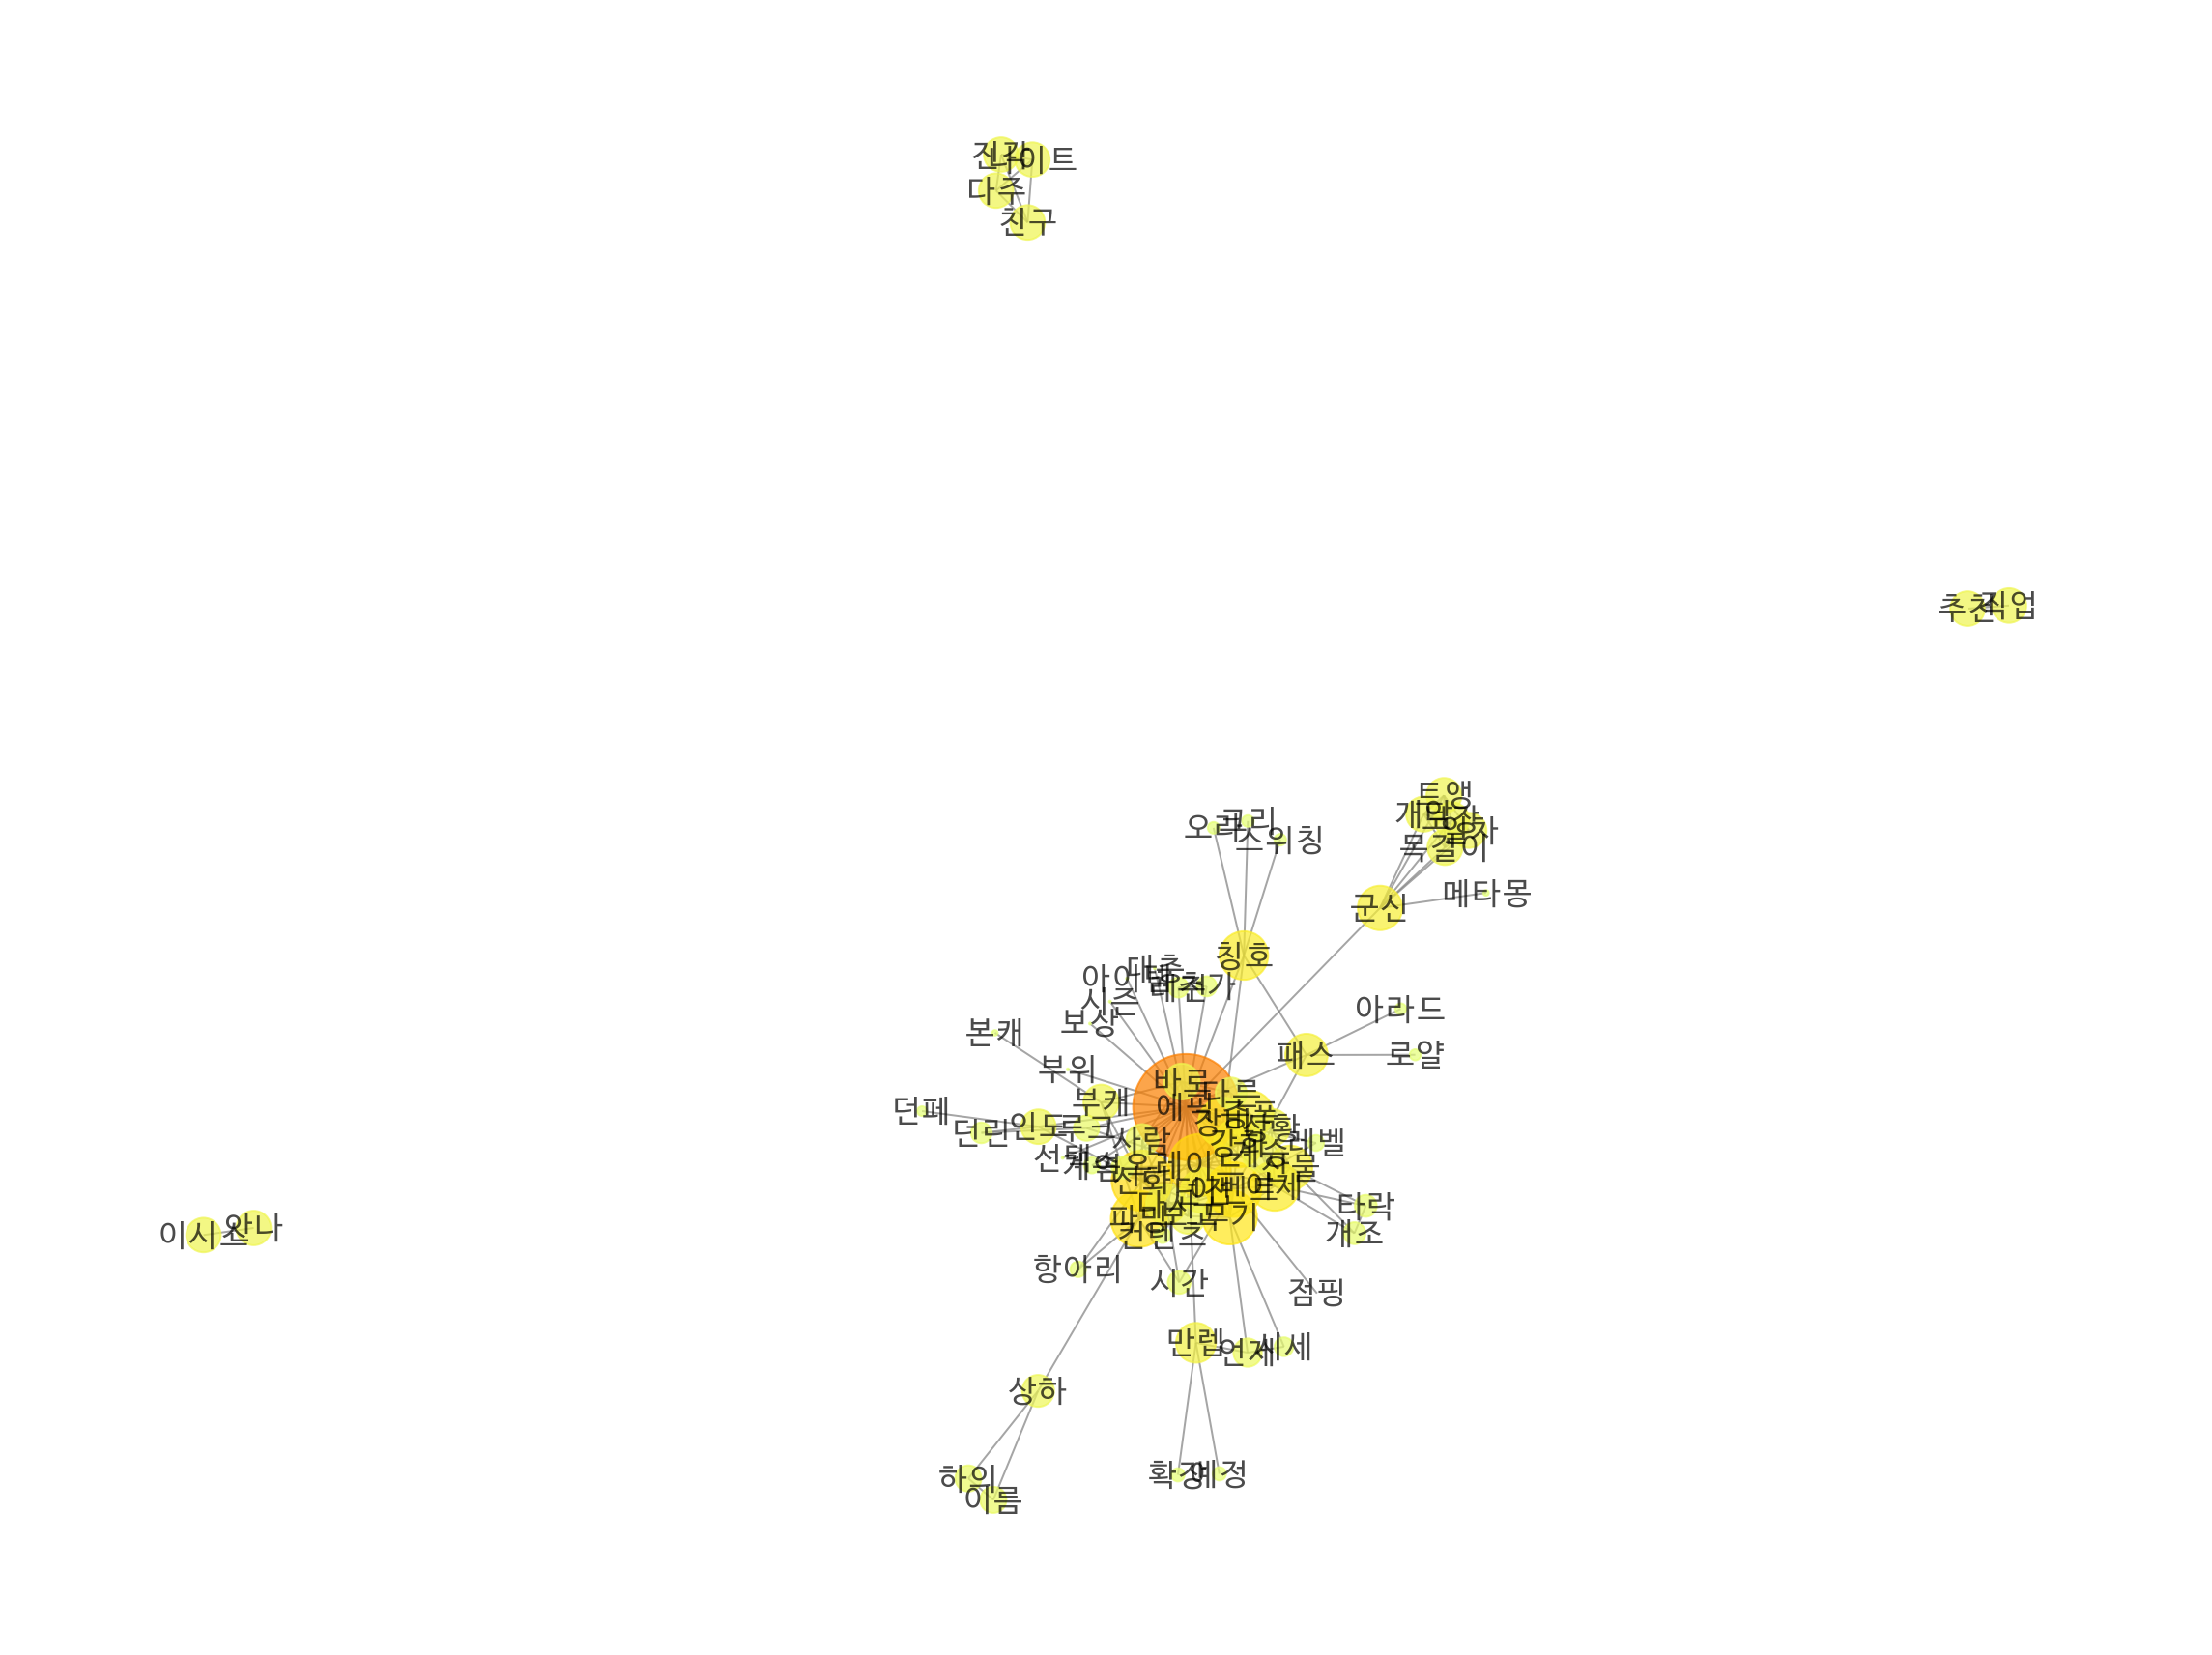

In [193]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G,font_family = 'KoPubDotum',font_size=16,
                node_color=list(pr.values()),node_size=nsize,
                pos = nx.fruchterman_reingold_layout(G),alpha=0.7,edge_color='.5',cmap=plt.cm.Wistia)
plt.savefig('신규.png',bbox_inches='tight')

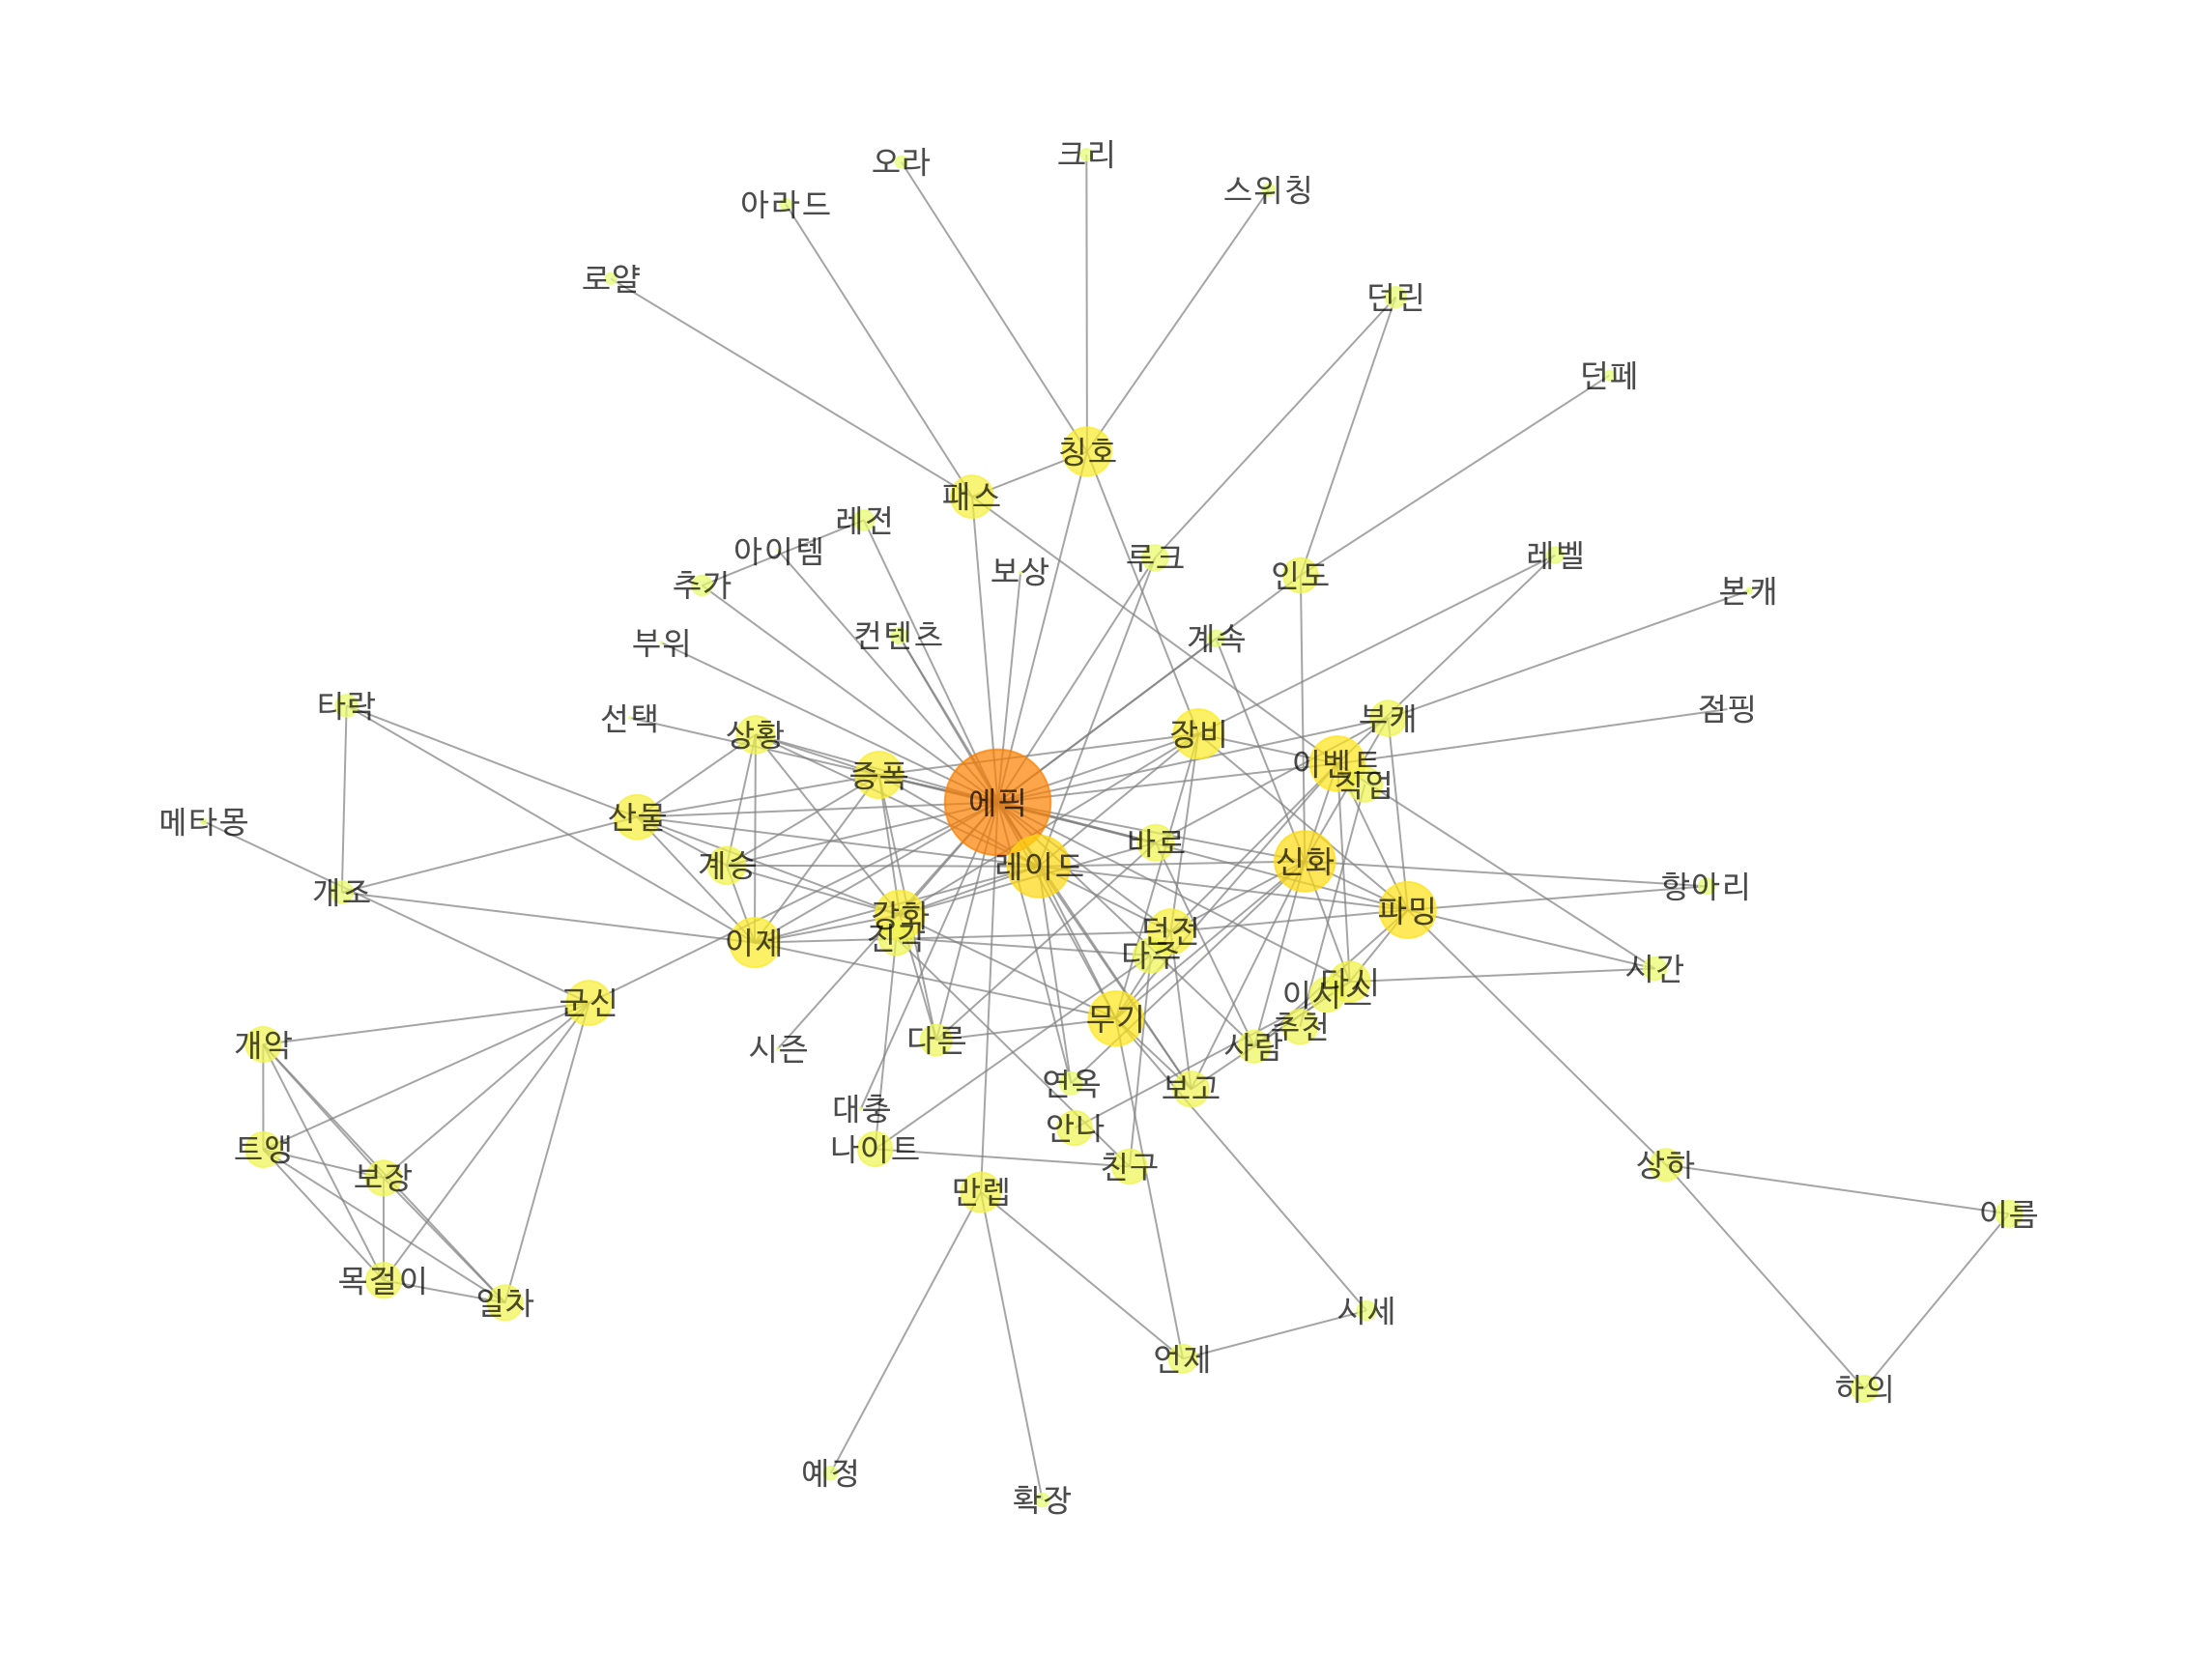

In [194]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G,font_family = 'KoPubDotum',font_size=16,
                node_color=list(pr.values()),node_size=nsize,
                pos = nx.kamada_kawai_layout(G),alpha=0.7,edge_color='.5',cmap=plt.cm.Wistia)
plt.savefig('신규.png',bbox_inches='tight')

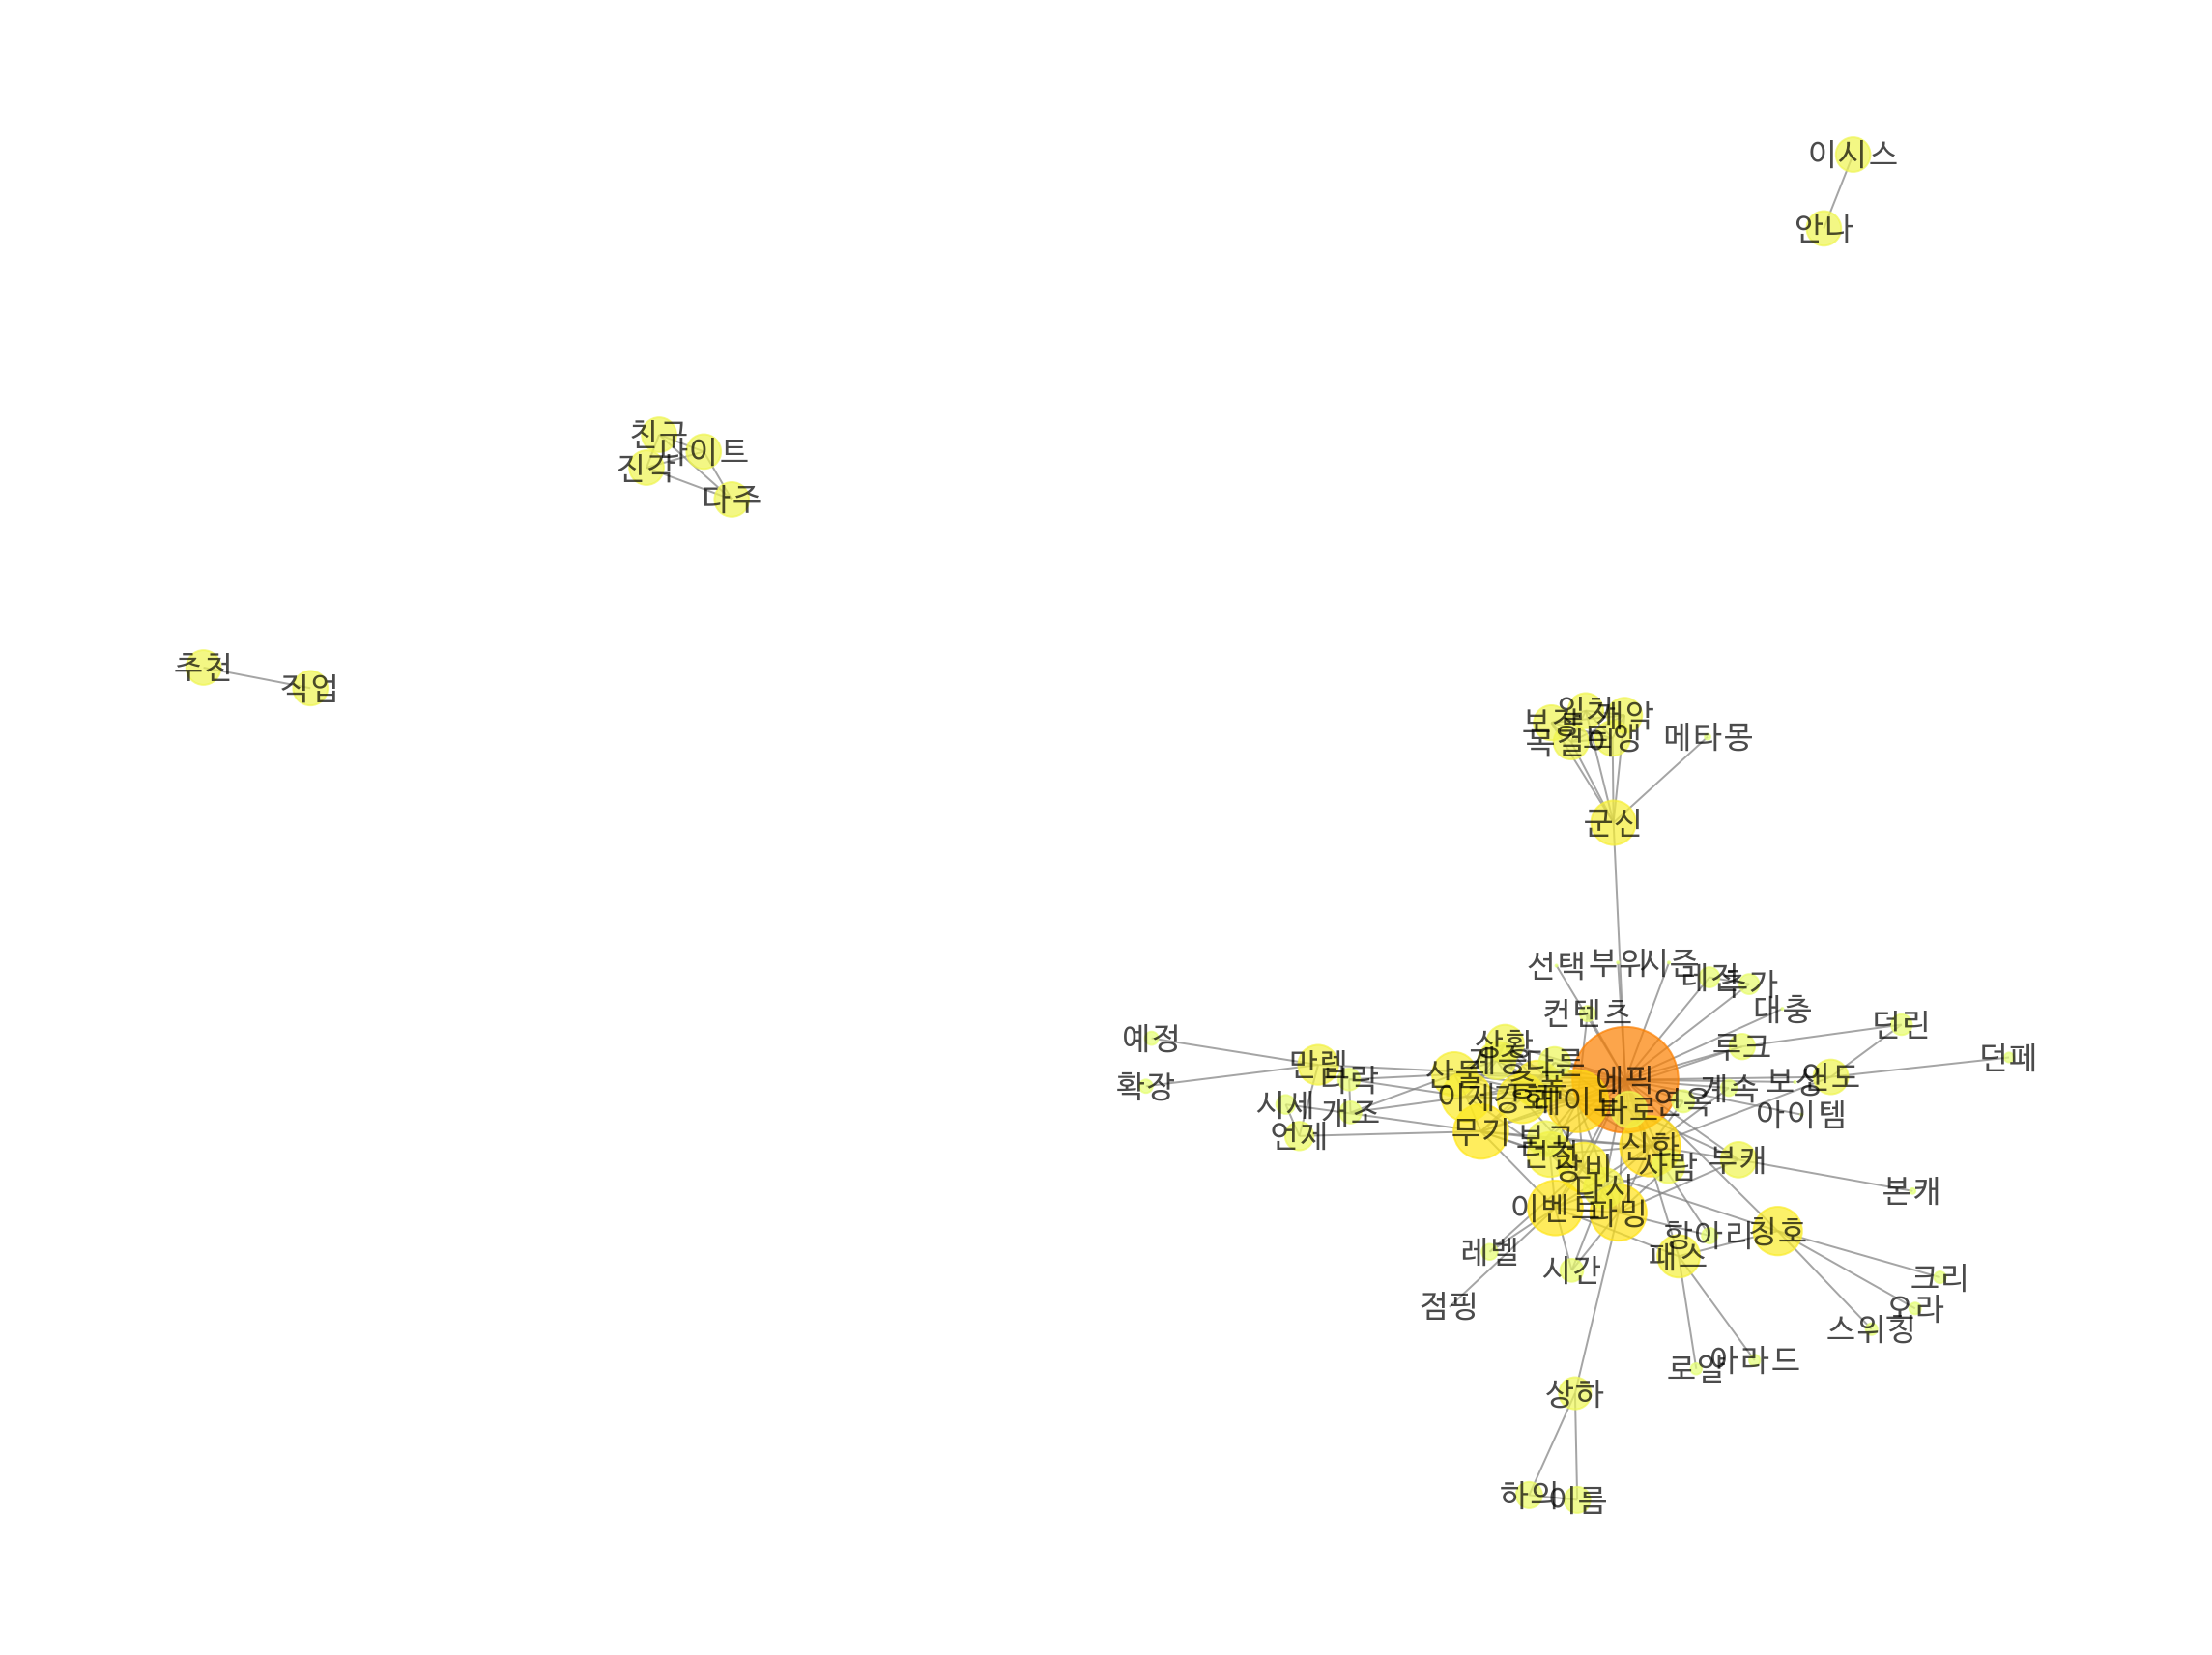

In [195]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G,font_family = 'KoPubDotum',font_size=16,
                node_color=list(pr.values()),node_size=nsize,
                alpha=0.7,edge_color='.5',cmap=plt.cm.Wistia)
plt.savefig('신규.png',bbox_inches='tight')